# Phase 1 Project Data Cleaning / EDA

## Business Problem

This is the problem our project is specifying:

`"Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase."`

In this notebook, we do the following:
- Clean the Aviation_Data.csv dataset by:
    - Removing irrelevant columns
    - Building dictionaries to fill in null values
    - Checking for duplicated records
    - Dropping irrelevant data
    - Removing some null values
    - Slicing a subset of the largest plane manufacturers
    - Creating a Year column for date filtering
- Export the cleaned DataFrame as a new CSV

## Importing the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

We had an import issue that Nick solved by specifying the data type for columns 6, 7, and 28.

In [2]:
with open('../data/Aviation_Data.csv', encoding='utf8') as f:
    dtypes = {'Column6Name': 'str', 'Column7Name': 'str', 'Column28Name': 'str'}
    df = pd.read_csv(f, dtype=dtypes, low_memory=False)

In [3]:
df.head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Okay, so we've got 90,348 records and 31 columns. Let's clean this up a bit.

## Cleaning the Data

#### Keeping / Removing Columns for These Reasons

Keeping
- Event ID and Accident Number: Keeping for now to screen for duplicates
- Event.Date: Might be useful
- Location and Country: Might be useful
- Injury Severity, Aircraft Damage: Will be useful
- Aircraft Category: Shows many records not involving airplanes, which we can remove later
- Make and Model: Need to determine which are the safest
- Amateur Built: Can probably use to remove from data. About 8.5k out of 90 are listed as amateur built
- Number of Engines: Will need further investigation. Some show 0 engines, most show one. We would only be looking at 2+ engine planes for enterprise use
- Engine Type: Useful
- Purpose of Flight: Useful for determining cause of accident
- Total Injuries columns: Useful
- Weather Conditions: May help determine possible cause
- Report Status: May be helpful in filtering

Removing
- Investigation Type: upon doing a .values_count(), we see it is not useful
- Latitude and Longitude: mostly null, also redundant since we have Location (city, state)
- Airport.Code and Airport Name: about half null, also irrelevant to determining safety
- Registration Number: irrelevant
- FAR Description: Stands for Federal Aviation Regulation description, not useful
- Schedule: Mostly null, also irrelevant
- Air Carrier: Mostly null, also irrelevant
- Broad Phase of Flight: Enough null values for a categorical data point that we should exclude
- Publication Date: Irrelevant when data was published

In [5]:
df.drop(['Investigation.Type','Latitude', 'Longitude', 'Airport.Code', 
         'Airport.Name', 'Registration.Number', 'FAR.Description', 
         'Schedule', 'Air.carrier', 'Broad.phase.of.flight', 
         'Publication.Date'], axis=1, inplace=True)

In [6]:
df.head(2)

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause


####  Drop Null Event ID's

In [7]:
# Hiding output for space

df[df['Event.Id'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 64030 to 90097
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                0 non-null      object 
 1   Accident.Number         0 non-null      object 
 2   Event.Date              0 non-null      object 
 3   Location                0 non-null      object 
 4   Country                 0 non-null      object 
 5   Injury.Severity         0 non-null      object 
 6   Aircraft.damage         0 non-null      object 
 7   Aircraft.Category       0 non-null      object 
 8   Make                    0 non-null      object 
 9   Model                   0 non-null      object 
 10  Amateur.Built           0 non-null      object 
 11  Number.of.Engines       0 non-null      float64
 12  Engine.Type             0 non-null      object 
 13  Purpose.of.flight       0 non-null      object 
 14  Total.Fatal.Injuries    0 non-null 

We're getting all null values in rows where Event ID is null. Let's drop those records.

In [8]:
df.dropna(subset=['Event.Id'], inplace=True)

####  Fill in Aircraft Category, Engine Counts, and Types

Before removing any non-null records, I'd like to try to fill in some null values for Aircraft Category, Engine Count, and Engine Type by making a dictionaries of existing data by Model. 

We know our company is only looking at airplanes, so we want to exclude any records for gliders, blimps, or helicopters. 

We also might want to look at number of crashes by Engine Count or Engine Type, so the more data we have there, the better.

Let's see if this dictionary idea works.

In [9]:
# Starting number for testing

df['Aircraft.Category'].count()

32287

In [10]:
# Creating a dictionary using Model as keys and Aircraft Category (non-null) as values

engine_count_dict = df[(df['Aircraft.Category'].isna() == 
                        False)].set_index('Model')['Aircraft.Category'].to_dict()

In [11]:
# Using this dictionary to fill in some null values in Aircraft Category

df['Aircraft.Category'] = df['Aircraft.Category'].fillna(df['Model'].map(engine_count_dict))

In [12]:
# Ending number

df['Aircraft.Category'].count()

80532

Got another 48,000! Let's try for Engine Count.

In [13]:
# Starting number

df['Number.of.Engines'].count()

82805

In [14]:
# {Model: Engine Count}, then use to fill in nulls

engine_count_dict = df[(df['Number.of.Engines'].isna() == 
                        False)].set_index('Model')['Number.of.Engines'].to_dict()

df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Model'].map(engine_count_dict))

df['Number.of.Engines'].count()

87803

Got another 5,000! Now let's do this for Engine Type.

In [15]:
# Starting number

df['Engine.Type'].count()

81812

In [16]:
# {Model: Engine Type}, then use to fill in nulls

engine_type_dict = df[(df['Engine.Type'].isna() == 
                        False)].set_index('Model')['Engine.Type'].to_dict()

df['Engine.Type'] = df['Engine.Type'].fillna(df['Model'].map(engine_type_dict))

df['Engine.Type'].count()

87703

Got another 6,000!

####  Drop any non-airplane records

Time to get the scalpel!

Let's look at Aircraft Category and exclude any non-airplane records.

In [17]:
# These are the records we need to drop

df[(df['Aircraft.Category'] != 'Airplane') & (df['Aircraft.Category'].isna() == False)].head()

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
16,20020917X01962,DEN82DTM08,1982-01-02,"MIDWAY, UT",United States,Non-Fatal,Destroyed,Helicopter,Enstrom,280C,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,IMC,Probable Cause
19,20020917X02339,MIA82DA028,1982-01-02,"MIAMI, FL",United States,Non-Fatal,Substantial,Helicopter,Smith,WCS-222 (BELL 47G),No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause
22,20020917X01657,ATL82DA027,1982-01-02,"CHAMBLEE, GA",United States,Non-Fatal,Substantial,Helicopter,Bell,206L-1,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,1.0,VMC,Probable Cause
46,20020917X02157,LAX82DA039,1982-01-06,"MAMMOTH LAKES, CA",United States,Non-Fatal,Substantial,Helicopter,Aerospatiale,SA-316B,No,1.0,Turbo Shaft,Business,0.0,0.0,0.0,6.0,VMC,Probable Cause
62,20020917X02247,LAX82DVG13,1982-01-09,"CALISTOGA, CA",United States,Non-Fatal,Substantial,Glider,Schleicher,ASW 20,No,0.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause


In [18]:
# Get their indexes and drop

nonplane_indexes = df[(df['Aircraft.Category'] != 'Airplane') 
                      & (df['Aircraft.Category'].isna() == False)].index

df.drop(index=nonplane_indexes, inplace=True)

In [19]:
# Now let's drop that column

df.drop(['Aircraft.Category'], axis=1, inplace=True)

####  Drop Engine Counts Below 2

Let's look further into Engine Counts. We can probably drop all records for single engine aircraft, as our company probably will not be using prop planes. But first - what's going on with the 0 engines?

In [20]:
df['Number.of.Engines'].value_counts()

1.0    64236
2.0    12379
3.0      561
0.0      536
4.0      529
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

In [21]:
df[df['Number.of.Engines'] == 0].head()

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
1505,20020917X03932,NYC82DA121,1982-06-09,"SHREWSBURY, PA",United States,Non-Fatal,Substantial,Scheicher,K8B,No,0.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause
3606,20001214X42064,MKC83LA051,1983-01-02,"INDIANOLA, IA",United States,Non-Fatal,NaN,Balloon Works,FIREFLY 7B,No,0.0,Unknown,Personal,0.0,1.0,0.0,1.0,VMC,Probable Cause
3659,20001214X42066,MKC83LA053,1983-01-08,"GREENWOOD, MO",United States,Non-Fatal,Substantial,Balloon Works,FIRE FLY 7-B,No,0.0,Unknown,Instructional,0.0,0.0,0.0,2.0,VMC,Probable Cause
3951,20001214X42143,ATL83LA123,1983-02-21,"WOODBINE, MD",United States,Non-Fatal,Substantial,Scheibe Flugzeugbau,L SPATZ-55,No,0.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause
4093,20001214X42553,NYC83LA076,1983-03-12,"BUENA VISTA, PA",United States,Non-Fatal,Substantial,Burkhart Grob,G10Z ASTIR CS,No,0.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause


With a bit of googling, we find that these are gliders and balloons. Exclude!

In [22]:
# Get their indexes and drop

engines_1and0_indexes = df[(df['Number.of.Engines'] == 0) 
                      | (df['Number.of.Engines'] == 1)].index

df.drop(index=engines_1and0_indexes, inplace=True)

####  Filter for US Data

As a brand new business line, we will likely only be operating in the US, so let's only look at US data. If want to move into international flight later, we can expand our analysis at that point. We would also need a totally different data set to do that accurately.

In [23]:
#Get non-US indexes and drop

foreign_indexes = df[df['Country'] != 'United States'].index

df.drop(index=foreign_indexes, inplace=True)

#### Look for duplicates

In [24]:
# New df containing duplicated Event ID's

df_duplicates1 = df[df.duplicated(subset=['Event.Id'], keep=False) == True].sort_values('Event.Id')

df_duplicates1

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
45704,20001205X00276,CHI99IA100A,1999-03-02,"SALINA, KS",United States,Incident,NaN,Mcdonnell Douglas,DC-10,No,3.0,Turbo Jet,Unknown,0.0,0.0,0.0,6.0,VMC,Probable Cause
45703,20001205X00276,CHI99IA100B,1999-03-02,"SALINA, KS",United States,Incident,NaN,Lockheed,L-1O11-385-1-15,No,3.0,Turbo Jet,Unknown,0.0,0.0,0.0,6.0,VMC,Probable Cause
45716,20001205X00305,DEN99LA047B,1999-03-05,"DENVER, CO",United States,Non-Fatal,Minor,Swearingen,SA226TC,No,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,2.0,VMC,Probable Cause
45719,20001205X00305,DEN99LA047A,1999-03-05,"DENVER, CO",United States,Non-Fatal,Substantial,Swearingen,SA226TC,No,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,2.0,VMC,Probable Cause
34436,20001206X00587,ATL94LA045B,1994-01-27,"MEMPHIS, TN",United States,Non-Fatal,Minor,Beech,E18S,No,2.0,Reciprocating,Positioning,0.0,0.0,0.0,2.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89300,20220614105258,DCA22WA130,2022-06-05,"Peshawar, OF",United States,NaN,NaN,BOEING,777,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,0.0,NaN,NaN
89383,20220623105317,DCA22LA135,2022-06-18,"New York, NY",United States,NaN,Minor,AIRBUS,A330,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,0.0,VMC,NaN
89384,20220623105317,DCA22LA135,2022-06-18,"New York, NY",United States,NaN,Substantial,BOEING,777,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,0.0,VMC,NaN
89966,20220915105950,DCA22LA201,2022-09-11,"Chicago, IL",United States,NaN,NaN,BOEING,737-823,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,0.0,NaN,NaN


We thought we may have found some misentries, but upon further inspection (Google), we realize these double listings are for collisions, so we have 2 different planes involved. Let's leave these in.

####  Drop Amateur-Built Planes

Now let's drop any amateur-built planes. We certainly are not in the market for those. 

In [25]:
# Get their indexes and drop

amateur_indexes = df[(df['Amateur.Built'] == 'Yes')].index

df.drop(index=amateur_indexes, inplace=True)

In [26]:
# Now let's drop that column

df.drop(['Amateur.Built'], axis=1, inplace=True)

####  Drop Null Makes / Models

Let's drop records where Make or Model are null

In [27]:
null_make_model_index = df[(df['Make'].isna()) | (df['Model'].isna())].index

df.drop(index=null_make_model_index, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10904 entries, 4 to 90338
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                10904 non-null  object 
 1   Accident.Number         10904 non-null  object 
 2   Event.Date              10904 non-null  object 
 3   Location                10901 non-null  object 
 4   Country                 10904 non-null  object 
 5   Injury.Severity         10830 non-null  object 
 6   Aircraft.damage         9597 non-null   object 
 7   Make                    10904 non-null  object 
 8   Model                   10904 non-null  object 
 9   Number.of.Engines       10621 non-null  float64
 10  Engine.Type             10811 non-null  object 
 11  Purpose.of.flight       9332 non-null   object 
 12  Total.Fatal.Injuries    9476 non-null   float64
 13  Total.Serious.Injuries  9316 non-null   float64
 14  Total.Minor.Injuries    9268 non-null 

####  Drop Null Aircraft Damage

We have quite a few null values for Aircraft Damage. What's going on here?

In [29]:
df['Aircraft.damage'].value_counts(dropna=False)

Substantial    5717
Destroyed      2622
NaN            1307
Minor          1253
Unknown           5
Name: Aircraft.damage, dtype: int64

In [30]:
df[(df['Aircraft.damage'].isna()) & (df['Report.Status'].isna() == False)]

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
79,20020917X01897,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,Incident,NaN,Lockheed,L-1011,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,149.0,UNK,Probable Cause
149,20020917X01767,ATL82IA041,1982-01-22,"LOUISVILLE, KY",United States,Incident,NaN,Dassault/sud,FALCON 20,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,2.0,VMC,Probable Cause
191,20020917X01768,ATL82IA042,1982-01-29,"ATLANTA, GA",United States,Incident,NaN,Beech,B200,2.0,Turbo Prop,Executive/corporate,0.0,0.0,0.0,2.0,VMC,Probable Cause
279,20020917X01769,ATL82IA051,1982-02-09,"BIRMINGHAM, AL",United States,Incident,NaN,Beech,200,2.0,Turbo Prop,Executive/corporate,0.0,0.0,0.0,10.0,IMC,Probable Cause
294,20020917X02571,NYC82IA036,1982-02-12,"JAMAICA, NY",United States,Incident,NaN,De Havilland,DHC-6-100,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,7.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86921,20210126102561,ERA21LA115,2021-01-14,"Myrtle Beach, SC",United States,Non-Fatal,NaN,BEECH,300,2.0,Turbo Prop,NaN,0.0,0.0,1.0,4.0,VMC,"An encounter with severe turbulence, which res..."
88921,20220404104886,CEN22LA166,2022-03-29,"Odessa, TX",United States,Serious,NaN,BEECH,B200,2.0,Turbo Prop,Business,0.0,0.0,1.0,5.0,VMC,The airplanes encounter with severe clear air...
88946,20220406104897,WPR22LA143,2022-04-02,"Van Nuys, CA",United States,Non-Fatal,NaN,BOMBARDIER INC,CL-600-2B16,2.0,Turbo Fan,Executive/corporate,0.0,0.0,0.0,8.0,VMC,The student pilots failure to maintain suffic...
89204,20220623105307,DCA22LA134,2022-05-22,"Tacoma, WA",United States,Minor,NaN,BOEING,737-700,2.0,Turbo Fan,NaN,0.0,1.0,0.0,66.0,VMC,During cruise flight with no reported turbulen...


Upon further inspection, it looks like many of these incidents involve unseated passengers getting injured when encountering turbulence. So the aircraft was undamaged in these records. This makes sense. Let's exclude these records, as they don't tell us much about safety.

In [31]:
# Get indexes and drop

damage_null_indexes = df[df['Aircraft.damage'].isna()].index

df.drop(index=damage_null_indexes, inplace=True)

#### Clean Up Makes

Get the values in the Makes column to match case.

In [32]:
# Convert Make column to title case

df['Make'] = df['Make'].str.title()

In [33]:
current_makes_list = df['Make'].value_counts().index.tolist()
len(current_makes_list)

300

As you can see, we've got too many Makers to properly analyze. Let's select a group of the largest manufacturers, then filter out the rest. We found this resource (http://www.fi-aeroweb.com/US-Commercial-Aircraft-Fleet.html) to narrow the list down. We also added a few that have been consolidated into larger manufacturers, such as Learjet (bought by Bombardier).

`We would like to note here that we would have preferred to use a more rigorous method to narrow down the list of manufacturers. However, finding reliable data on things like market share or successful flights in a given time period without paying for it is impossible.`

In [34]:
keep_makes_list = ['Boeing', 'Airbus', 'Bombardier', 'Embraer', 
                   'Cessna', 'Mcdonnell Douglas', 'ATR', 'Gulfstream', 
                   'Lockheed', 'Convair', 'Douglas', 'Dassault', 
                   'CASA', 'Hawker', 'Curtiss', 'Pilatus', 'Beech',
                   'Honda', 'Raytheon', 'Learjet']

Many of the Make data points in our set have been entered inconsistently. This function will help us make sure we don't lose any points that contain one of our list of manufacturers.

In [35]:
def planemaker(maker, list):
    for manufacturer in list:
        if manufacturer in maker:
            return manufacturer
        else:
            continue

In [36]:
df['Manufacturer'] = df['Make'].apply(lambda x: planemaker(x, keep_makes_list))

In [37]:
# Get indexes and drop

manufacturer_null_indexes = df[df['Manufacturer'].isna()].index

df.drop(index=manufacturer_null_indexes, inplace=True)

####  Make Year Column for Date Filtering

Since this data goes back to the 60s, we probably want the ability to easily filter out old data. Let's use the date column to create a year column.

In [38]:
# Convert Date column to datetime, then create Year column

df['Event.Date'] = pd.to_datetime(df['Event.Date'])

df['Year'] = df['Event.Date'].dt.year

####  Create New CSV File of Cleaned Data

In [39]:
df.to_csv('../data/Aviation_Data_Cleaned.csv')

### Now let's start doing some Analysis!

First, we will load and open the cleaned CSV file. We will call it "aviation_cleaned" and use it moving forward.

In [40]:
with open('../data/Aviation_Data_Cleaned.csv', encoding='utf8') as f:
    dtypes = {'Column6Name': 'str', 'Column7Name': 'str', 'Column28Name': 'str'}
    aviation_cleaned = pd.read_csv(f, dtype=dtypes, low_memory=False)

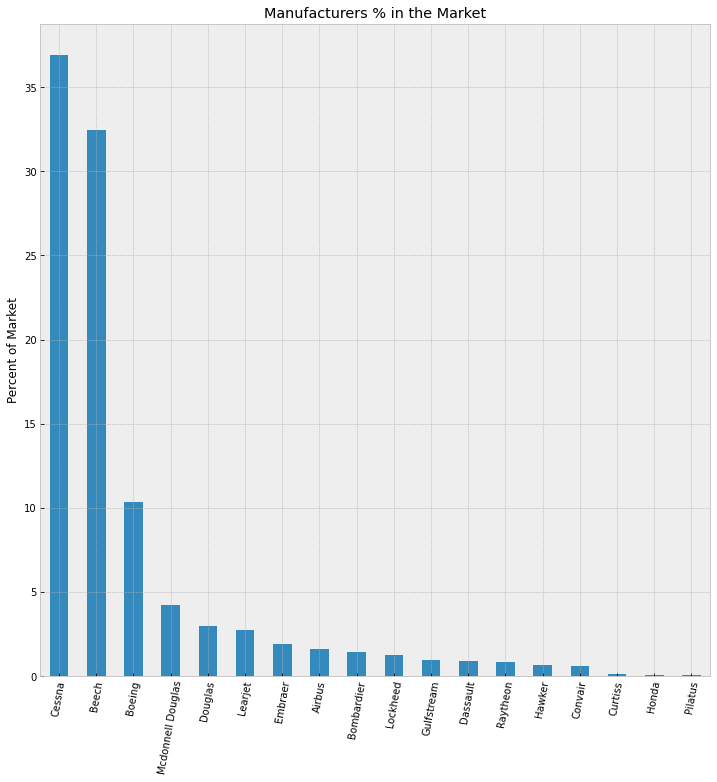

In [41]:
(aviation_cleaned['Manufacturer'].value_counts(normalize=True) * 100).plot(kind='bar', figsize=(12,12),
                            title='Manufacturers % in the Market', ylabel= "Percent of Market", rot=80);

As seen with the data, Cessna has the highest percentage of manufactured planes, while Pilatus has the least.

Now let's compare the total fatal injuries per manufacturer.

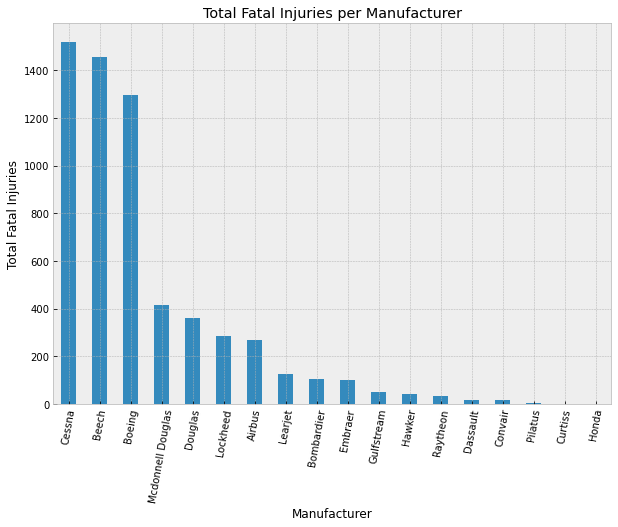

In [42]:
# total fatal injuries per manufacturer
aviation_cleaned.groupby('Manufacturer')["Total.Fatal.Injuries"].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,7),title="Total Fatal Injuries per Manufacturer", ylabel="Total Fatal Injuries", rot=80);

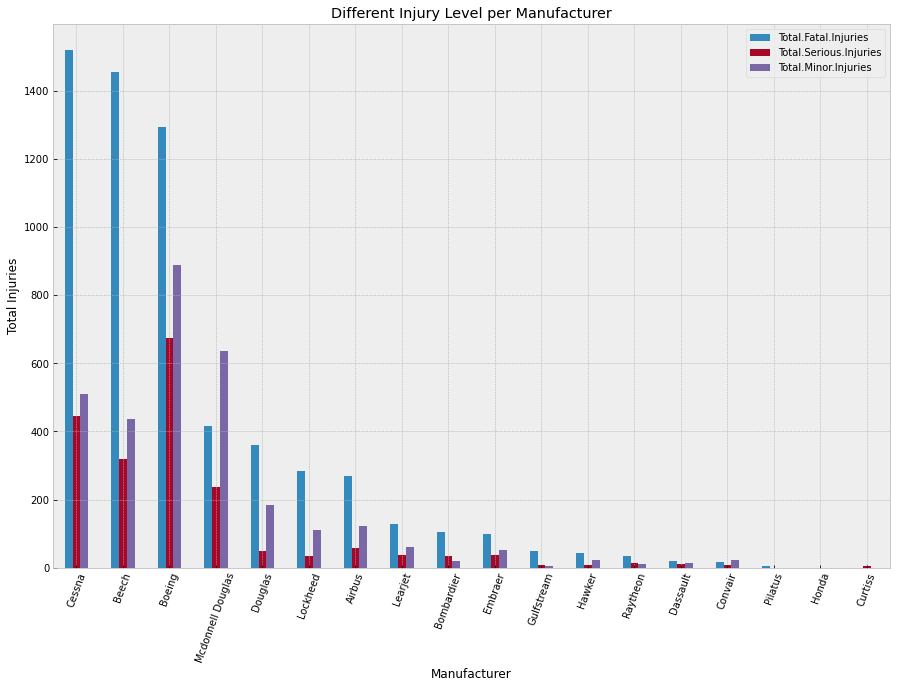

In [43]:
# let's compare all of the injury types per manufacturer.
# excluding non-injured

aviation_cleaned.groupby('Manufacturer')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum().sort_values(by='Total.Fatal.Injuries', ascending=False).plot(kind='bar', figsize=(15,10), title='Different Injury Level per Manufacturer', ylabel='Total Injuries', rot=70);

From here, it is looking like Cessna, Beech, and Boeing seem to have more fatal injuries than any other type of injury. This is unsurprising as they are the biggest manufacturers. Cessna has the most fatalities, but Boeing has the most minor and serious injuries. 

Let's compare aircraft damage to injuries next. 

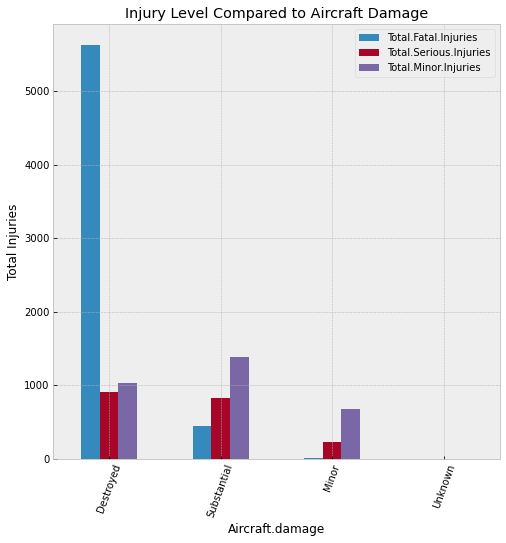

In [44]:
#injury level vs aircraft damage
aviation_cleaned.groupby('Aircraft.damage')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum().sort_values(by='Total.Fatal.Injuries', ascending=False).plot(kind='bar', figsize=(8,8), title='Injury Level Compared to Aircraft Damage', ylabel='Total Injuries', rot=70);

The more damage the aircraft has sustained, the more fatalities there are. This makes sense.

Let's see if the weather has an impact on fatalities. 

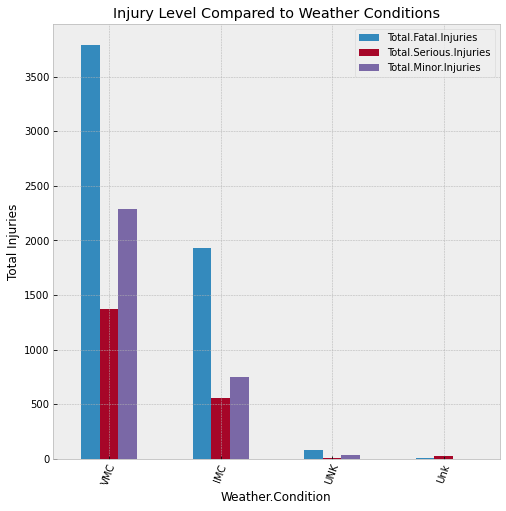

In [45]:
aviation_cleaned.groupby('Weather.Condition')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum().sort_values(by='Total.Fatal.Injuries', ascending=False).plot(kind='bar', figsize=(8,8), title='Injury Level Compared to Weather Conditions', ylabel='Total Injuries', rot=70);

So the VMC category has the highest fatality rate, which is interesting. According to google, VMC describes weather conditions where a pilot can safely fly the plane without any instruments. IMC is when pilots rely on instruments to fly the plane due to bad weather. 

From this, one can infer that bad weather doesn't necessarily cause fatality rates to increase (it will always be risky to fly in bad weather, but not any more than usual). I wonder what other factor is causing the accidents.

What was the purpose of the flight for each injury level?

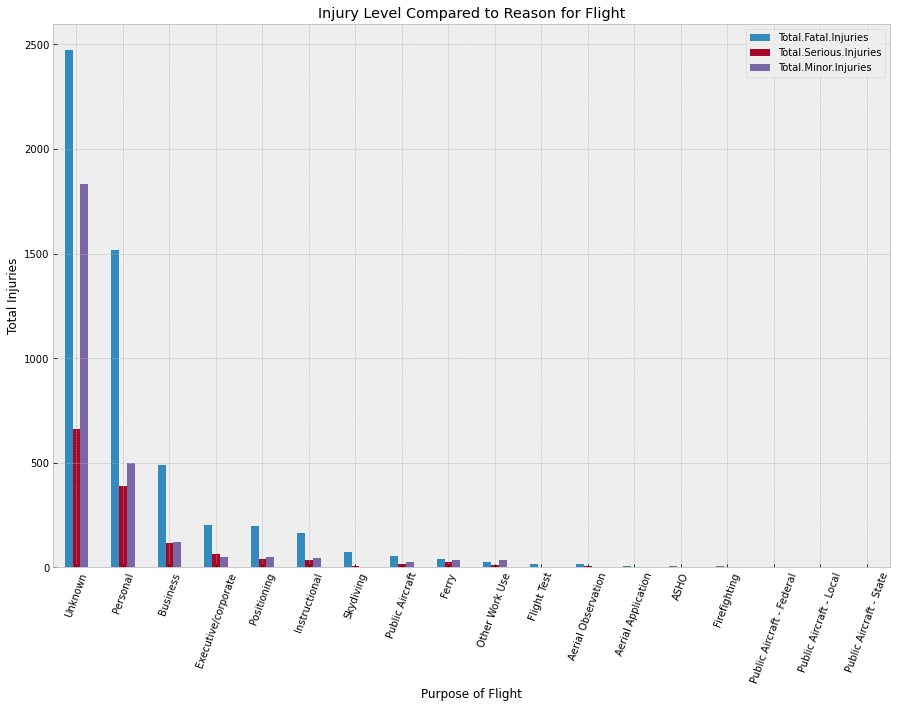

In [46]:
aviation_cleaned.groupby('Purpose.of.flight')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum().sort_values(by='Total.Fatal.Injuries', ascending=False).plot(kind='bar', figsize=(15,10), title='Injury Level Compared to Reason for Flight', ylabel='Total Injuries', xlabel='Purpose of Flight', rot=70);

In [47]:
aviation_cleaned['Purpose.of.flight'].isna().sum()

820

We have about 820 null values for purpose of flight. Seems like much of the data is for an unknown flight reason, so we'll need to clean this column if we want to use it. Seems like after the nulls, personal and business have the next highest fatality rates.

Let's see if the number of engines has an impact on the severity of injuries.

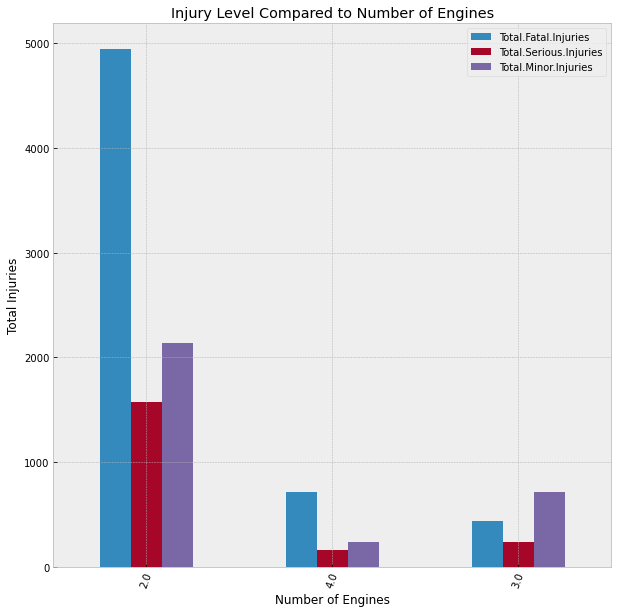

In [48]:
#injuries vs number of engines
aviation_cleaned.groupby('Number.of.Engines')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum().sort_values(by='Total.Fatal.Injuries', ascending=False).plot(kind='bar', figsize=(10,10), title='Injury Level Compared to Number of Engines', ylabel='Total Injuries', xlabel='Number of Engines', rot=70);

It looks like 2 engine planes tend to have the most injuries overall. Are they are the most manufactured?

In [49]:
aviation_cleaned['Number.of.Engines'].value_counts(normalize=True) * 100

2.0    91.250213
3.0     4.878049
4.0     3.871738
Name: Number.of.Engines, dtype: float64

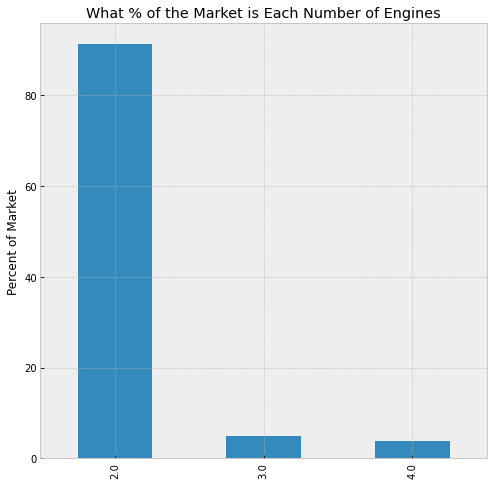

In [50]:
(aviation_cleaned['Number.of.Engines'].value_counts(normalize=True) * 100).plot(kind='bar', figsize=(8,8),
                            title='What % of the Market is Each Number of Engines', ylabel= "Percent of Market");

Yes! 2 engine planes make up around 91% of the data! Explains why the fatality rate is the highest for them.

What is the average number of engines per manufacturer?

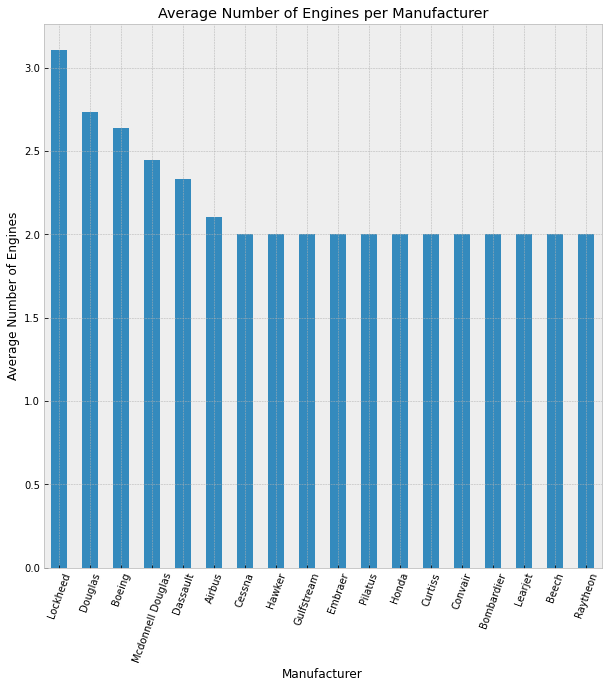

In [51]:
aviation_cleaned.groupby('Manufacturer')['Number.of.Engines'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,10), title='Average Number of Engines per Manufacturer', ylabel='Average Number of Engines', xlabel='Manufacturer', rot=70);

Most manufacturers have around 2 engine planes with a few that manufacture 3 or 4 engine planes.

What are the different engine types and what percent of the market are they?

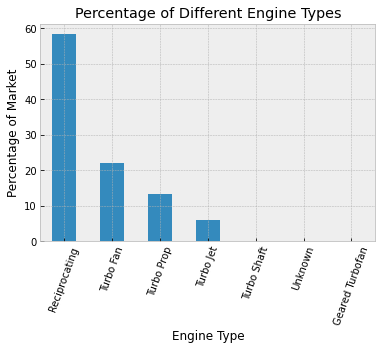

In [52]:
(aviation_cleaned['Engine.Type'].value_counts(normalize=True)*100).plot(kind="bar", title=('Percentage of Different Engine Types'), rot=70, xlabel=('Engine Type'), ylabel='Percentage of Market');

Reciprocating engines make up 58% of the data. According to google, this type of engine is highly efficient (low fuel consumption) and is relatively inexpensive. It makes sense why it's majority of the market. 

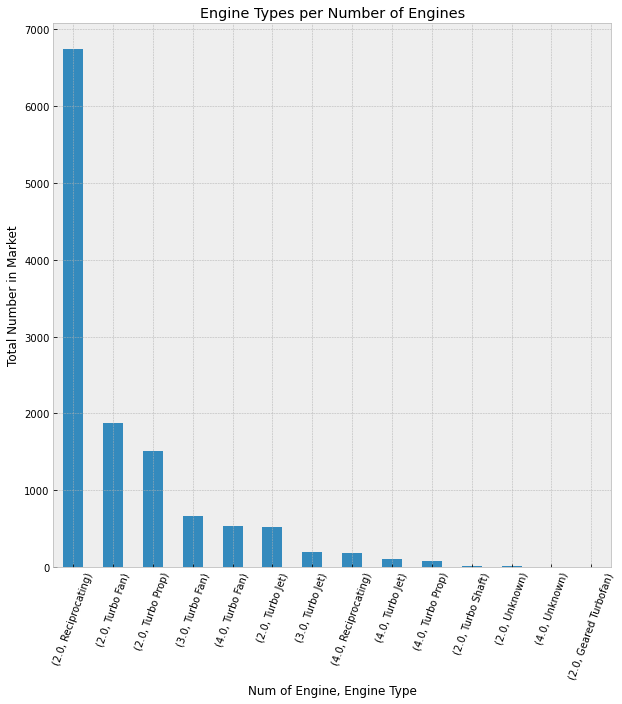

In [53]:
aviation_cleaned.groupby(['Number.of.Engines', 'Engine.Type'])['Number.of.Engines'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10,10), title=('Engine Types per Number of Engines'), rot=70, xlabel=('Num of Engine, Engine Type'), ylabel='Total Number in Market');

As expeccted, 2 reciprocating engines are the most prominent in the industry. 

<ipython-input-54-5c2f00e30c3f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aviation_cleaned.groupby(['Number.of.Engines', 'Engine.Type'])['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries'].sum().sort_values(by='Total.Fatal.Injuries', ascending=False).plot(kind="bar", figsize=(12,8), title=('Engine Types per Number of Engines'), rot=70, xlabel=('Num of Engine, Engine Type'), ylabel='Total Number in Market');


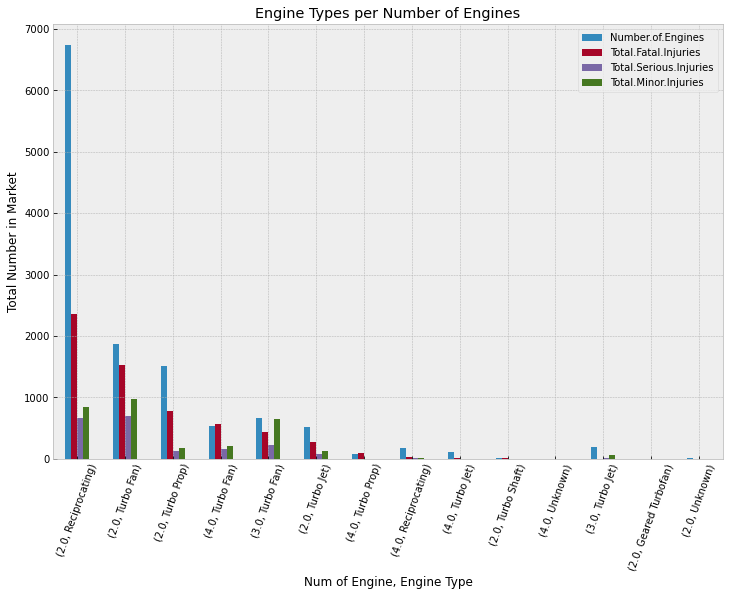

In [54]:
aviation_cleaned.groupby(['Number.of.Engines', 'Engine.Type'])['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries'].sum().sort_values(by='Total.Fatal.Injuries', ascending=False).plot(kind="bar", figsize=(12,8), title=('Engine Types per Number of Engines'), rot=70, xlabel=('Num of Engine, Engine Type'), ylabel='Total Number in Market');

2 reciprocating engines have the most fatalities (as expected, they're the most popular). What's interesting is that it seems like 2 turbo fan engines ratio isn't that far off, so perhaps turbo fans are not as safe as reciprocating engines.

So now let's see if we can compare aircraft damage per manufacturer on a number of factors. We already know Cessna, Beech, and Boeing have the greatest number of fatalities, and they also produce the most planes. 

In [55]:
aviation_cleaned.groupby(['Manufacturer', 'Aircraft.damage'])['Number.of.Engines'].describe()

count      mean       std  min  25%  50%  \
Manufacturer      Aircraft.damage                                              
Airbus            Destroyed           2.0  2.000000  0.000000  2.0  2.0  2.0   
                  Minor              62.0  2.129032  0.495351  2.0  2.0  2.0   
                  Substantial        29.0  2.068966  0.371391  2.0  2.0  2.0   
Beech             Destroyed         581.0  2.000000  0.000000  2.0  2.0  2.0   
                  Minor             121.0  2.000000  0.000000  2.0  2.0  2.0   
                  Substantial      1202.0  2.000000  0.000000  2.0  2.0  2.0   
Boeing            Destroyed          33.0  2.666667  0.853913  2.0  2.0  2.0   
                  Minor             351.0  2.672365  0.754646  2.0  2.0  2.0   
                  Substantial       223.0  2.582960  0.800381  2.0  2.0  2.0   
Bombardier        Destroyed           3.0  2.000000  0.000000  2.0  2.0  2.0   
                  Minor              29.0  2.000000  0.000000  2.0  2.0  2.0   
                  Substantial        53.0  2.000000  0.000000  2.0  2.0  2.0   
Cessna            Destroyed         705.0  2.000000  0.000000  2.0  2.0  2.0   
                  Minor              89.0  2.022472  0.212000  2.0  2.0  2.0   
                  Substantial      1370.0  2.001460  0.054034  2.0  2.0  2.0   
                  Unknown             3.0  2.000000  0.000000  2.0  2.0  2.0   
Convair           Destroyed          10.0  2.000000  0.000000  2.0  2.0  2.0   
                  Minor               4.0  2.000000  0.000000  2.0  2.0  2.0   
                  Substantial        19.0  2.000000  0.000000  2.0  2.0  2.0   
Curtiss           Substantial         7.0  2.000000  0.000000  2.0  2.0  2.0   
Dassault          Destroyed           7.0  2.285714  0.487950  2.0  2.0  2.0   
                  Minor               9.0  2.444444  0.527046  2.0  2.0  2.0   
                  Substantial        35.0  2.314286  0.471008  2.0  2.0  2.0   
Douglas           Destroyed          44.0  2.772727  0.985090  2.0  2.0  2.0   
                  Minor              46.0  2.869565  0.933540  2.0  2.0  2.5   
                  Substantial        86.0  2.639535  0.906354  2.0  2.0  2.0   
Embraer           Destroyed          12.0  2.000000  0.000000  2.0  2.0  2.0   
                  Minor              35.0  2.000000  0.000000  2.0  2.0  2.0   
                  Substantial        62.0  2.000000  0.000000  2.0  2.0  2.0   
Gulfstream        Destroyed          17.0  2.000000  0.000000  2.0  2.0  2.0   
                  Minor               9.0  2.000000  0.000000  2.0  2.0  2.0   
                  Substantial        31.0  2.000000  0.000000  2.0  2.0  2.0   
Hawker            Destroyed          14.0  2.000000  0.000000  2.0  2.0  2.0   
                  Minor               5.0  2.000000  0.000000  2.0  2.0  2.0   
                  Substantial        20.0  2.000000  0.000000  2.0  2.0  2.0   
Honda             Substantial         4.0  2.000000  0.000000  2.0  2.0  2.0   
Learjet           Destroyed          52.0  2.000000  0.000000  2.0  2.0  2.0   
                  Minor               9.0  2.000000  0.000000  2.0  2.0  2.0   
                  Substantial        99.0  2.000000  0.000000  2.0  2.0  2.0   
Lockheed          Destroyed          28.0  3.000000  0.981307  2.0  2.0  3.0   
                  Minor              21.0  3.190476  0.511766  2.0  3.0  3.0   
                  Substantial        25.0  3.160000  0.898146  2.0  2.0  3.0   
Mcdonnell Douglas Destroyed          19.0  2.473684  0.611775  2.0  2.0  2.0   
                  Minor             129.0  2.503876  0.662901  2.0  2.0  2.0   
                  Substantial        98.0  2.367347  0.581285  2.0  2.0  2.0   
Pilatus           Destroyed           1.0  2.000000       NaN  2.0  2.0  2.0   
                  Substantial         0.0       NaN       NaN  NaN  NaN  NaN   
Raytheon          Destroyed           9.0  2.000000  0.000000  2.0  2.0  2.0   
                  Minor             

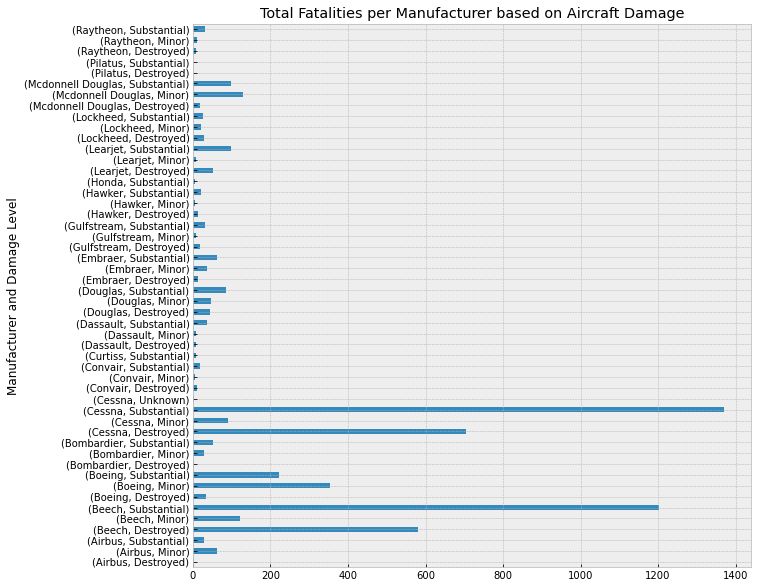

In [56]:
manu_air_damage = aviation_cleaned.groupby(['Manufacturer', 'Aircraft.damage'])['Total.Fatal.Injuries'].size()
manu_air_damage.plot(kind='barh', stacked=True, figsize=(10,10), title='Total Fatalities per Manufacturer based on Aircraft Damage', xlabel='Manufacturer and Damage Level'); 


In [57]:
## want to get the above chart to be a stacked bar graph instead